In [9]:
from boost_astar import AStarOnImage
import numpy as np
import matplotlib.pyplot as plt
from random import randint, seed

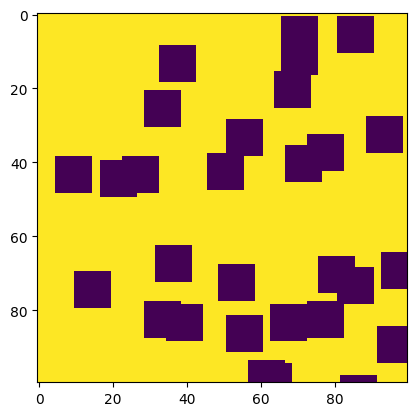

In [12]:
image = np.ones((100, 100), "uint8")*255

seed(9001)
for i in range(30):
    x = randint(1, 98)
    y = randint(1, 98)
    image[y:y+10, x:x+10] = 0

plt.imshow(image)

In [13]:
astar = AStarOnImage(image)

/usr/local/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


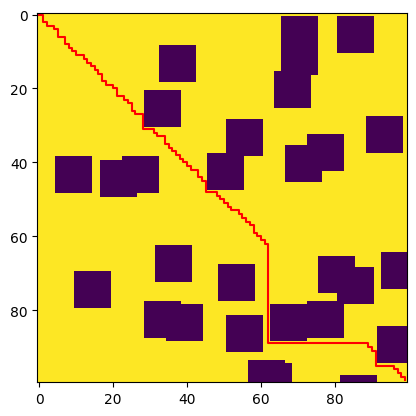

In [15]:
path = astar.plan_by_coordinates((0, 0), (99, 99))
plt.imshow(image)
plt.plot(*zip(*path), "r-")